# Movie Recommendation Project

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Business Goals](#Business-Goals)
* 1.3 [Business Success Criteria](#Business-Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)
* 2.1 [Importing Packages and Reading in Data](#Importing-Packages-and-Reading-in-Data)
* 2.2 [Previewing the Data](#Previewing-the-Data)
* 2.3 [Numeric Feature Investigation](#Numeric-Feature-Investigation)
  * 2.3.1 [Summary Statistics](#Summary-Statistics)
  * 2.3.2 [Distribution Visualizations](#Distribution-Visualizations)
* 2.4 [Inspecting Null Values](#Inspecting-Null-Values) 
* 2.5 [Investigating Cardinality and Feature Contents](#Investigating-Cardinality-and-Feature-Contents)
* 2.6 [Inspecting Class Distribution](#Inspecting-Class-Distribution)
  * 2.6.1 [Mapping Well Status](#Mapping-Well-Status)
* 2.7 [Initial Data Observations](#Initial-Data-Observations)

### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)
* 5.1 [Train-Test-Split](#Train-Test-Split)
  * 5.1.1 [Evaluation Metrics Function](#Evaluation-Metrics-Function)
* 5.2 [Baseline Logistic Regression Model](#Baseline-Logistic-Regression-Model)
  * 5.2.1 [Preprocessing Categorial Features with `OneHotEncoder()`](#Preprocessing-Categorial-Features-with-`OneHotEncoder()`)
  * 5.2.2 [Preprocessing Numeric Features with `MinMaxScaler()`](#Preprocessing-Numeric-Features-with-`MinMaxScaler()`)
  * 5.2.3 [Training and Fitting Baseline Model](#Training-and-Fitting-Baseline-Model)
  * 5.2.4 [Evaluating Baseline Model](#Evaluating-Baseline-Model)
* 5.3 [Training Additional Models](#Training-Additional-Models)
  * 5.3.2 [Creating Pipelines for Additional Models](#Creating-Pipelines-for-Additional-Models)
  * 5.3.3 [Training and Evaluating New Models](#Training-and-Evaluating-New-Models)
* 5.4 [Decision Tree Feature Selection and Hyperparameter Tuning](#Decision-Tree-Feature-Selection-and-Hyperparameter-Tuning)
  * 5.4.1 [Feature Selection with `feature_importances_`](#Feature-Selection-with-`feature_importances_`)
  * 5.4.2 [Feature Selection with RFE](#Feature-Selection-with-RFE)
  * 5.4.3 [Hyperparameter Tuning](#hyperparameter-tuning)
* 5.5 [Random Forest Feature Selection and Hyperparameter Tuning](#Random-Forest-Feature-Selection-and-Hyperparameter-Tuning)
  * 5.5.1 [Feature Selection with RFE](#Feature-Selection-with-RFE)
  * 5.5.2 [Hyperparameter Tuning](#Hyperparameter-Tuning)

### 6. [Evaluation](#Final-Model-Evaluation)


### 7. [Conclusions](#Conclusions)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [Resources](#Resources)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

The Kanopy app is a movie streaming service widely used by public libraries and universities, offering a vast library of films, documentaries, educational content, and more. While it has a dedicated user base, Kanopy faces challenges in competing with larger, more popular streaming platforms like Netflix and Hulu. A key factor contributing to this challenge is the absence of personalized features, such as movie recommendations. By enhancing the app with a recommendation system, Kanopy can deliver tailored content to users, helping them discover new movies, improve user engagement, and increase user retention. The implementation of a recommendation system is essential to keeping users satisfied and competing with other platforms in the crowded streaming market.

### 1.2 <a name ="Business-Goals"></a> Business Goals

The primary goal of this project is to develop and implement a personalized movie recommendation system for the Kanopy app. The recommendation system will provide users with top 5 movie recommendations based on past ratings and viewing history.

### 1.3 <a name ="Business-Success-Criteria"></a> Business Success Criteria

## 2. <a name ="Data-Understanding"></a> Data Understanding

### 2.1 <a name ="Importing-Packages-and-Reading-in-Data"></a> Importing Packages and Reading in Data

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### 2.1.1 Movies Dataset

In [2]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
#prints duplicate rows

duplicate_rows = movies[movies.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [movieId, title, genres]
Index: []


In [12]:
# prints rows that have a duplicate movieId and title
duplicate_rows = movies[movies.duplicated(subset=['movieId', 'title'])]
print(duplicate_rows)

Empty DataFrame
Columns: [movieId, title, genres]
Index: []


In [14]:
# Split genres into separate values, and flatten the list
all_genres = movies['genres'].str.split('|', expand=True).stack()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Print the genre counts
print(genre_counts)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64


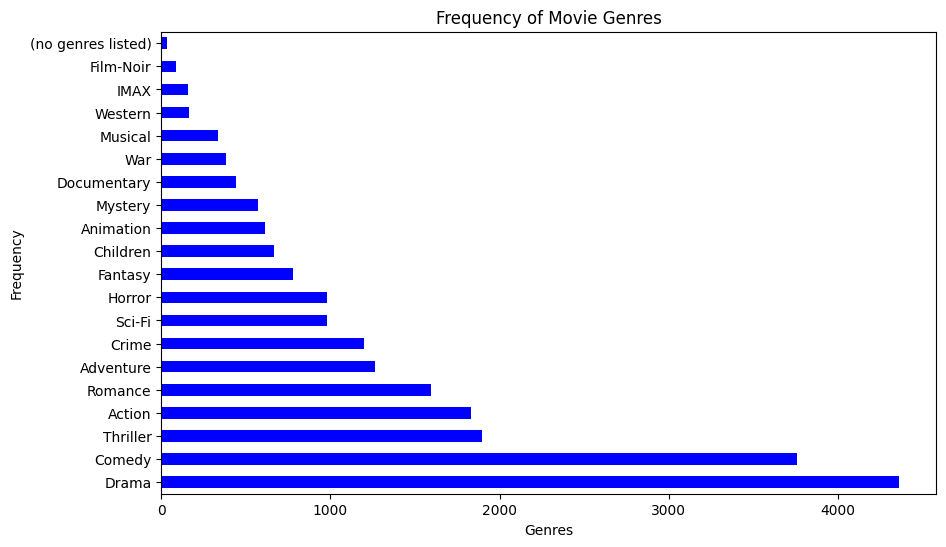

In [22]:
# Plot bar graph of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='blue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()

#### 2.1.2 Ratings Dataset

In [4]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
ratings.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [24]:
ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [25]:
ratings[['movieId', 'rating']].value_counts()

movieId  rating
318      5.0       153
296      5.0       123
356      5.0       116
2571     5.0       109
260      5.0       104
                  ... 
5096     1.5         1
         1.0         1
5095     4.5         1
5094     3.0         1
193609   4.0         1
Length: 30417, dtype: int64

In [38]:
average_rating = ratings.groupby('movieId')['rating'].mean().sort_values(ascending = False)
average_rating

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
         ... 
157172    0.5
85334     0.5
53453     0.5
8494      0.5
71810     0.5
Name: rating, Length: 9724, dtype: float64

#### 2.1.3 Tags Dataset

In [5]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


## 3. <a name ="Data-Preparation"></a> Data Preparation

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis

## 5. <a name ="Modeling"></a>  Modeling

## 6. <a name ="Final-Model-Evaluation"></a> Evaluation

## 7. <a name ="Conclusions"></a> Conclusions

### 7.1 <a name ="Limitations"></a> Limitations

### 7.2 <a name ="Recommendations"></a> Recommendations

### 7.3 <a name ="Next-Steps"></a> Next Steps